# Project: Wrangling and Analyze Data

## Introduction

The dataset I am wrangling is the tweet archive of Twitter User @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 

The archive contains basic tweet data for tweets as at August 1,2017.

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [8]:
#importing the necessary packages for the wrangling process 
import pandas as pd
import numpy as np
import datetime
import json

In [ ]:
#pip install tweepy

In [2]:
#Importing tthe twitter archive dataset
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Getting url of the file
import requests
import os

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

response

<Response [200]>

In [4]:
#getting file with the image predictions
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [5]:
#Getting list of files in our folder
os.listdir()

['#6 Data Wrangling Web Scraping.ipynb',
 '.ipynb_checkpoints',
 'act_report.html',
 'act_report.ipynb',
 'DATA WRANGLING PROJECT',
 'DATA WRANGLING PROJECT.zip',
 'fig1.png',
 'fig2.png',
 'image-predictions.tsv',
 'tweet-json.txt',
 'twitter-api.py',
 'twitter-archive-enhanced.csv',
 'twitter_archive_master.csv',
 'wrangle_act.html',
 'wrangle_act.ipynb',
 'wrangle_act_full.ipynb',
 'wrangle_report.html',
 'wrangle_report.ipynb']

In [6]:
#Importing the image prediction file into the panda dataframe
df_image_pred = pd.read_csv('image-predictions.tsv', sep='\t', encoding='utf-8')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
#Getting the twitter data from the twitter API
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file

consumer_key = 'TTTTT' 
consumer_secret = 'teert' 
access_token = 'uio' 
access_secret = 'giuotg' 

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)


api = tweepy.API(auth, wait_on_rate_limit=True, ) 

tweet_ids = df1.tweet_id.values
len(tweet_ids)

#Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

#Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    #This Loop will likely take 20 - 30 minutes to run because of twitters rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ': ' + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            print("Success")
            json.dump(tweet._json,outfile)
            outfile.write('\n')
        except AttributeError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [9]:
#getting file with the twitter information
with open('tweet-json.txt', encoding='utf-8') as file:
    for line in file.readlines():
        line = json.loads(line)
        print(line)
        break

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [10]:
#Loading the tweet json dataset 
df_tweet_json = pd.read_json('tweet-json.txt', lines=True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



Visual assessment: 

In [11]:
#Looking at the whole dataframe.
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


Programmatic assessment

In [12]:
#Getting the information about the dataframe
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
# Getting a sample of the dataframe
df_twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1607,685663452032069632,NaN,NaN,2016-01-09 03:24:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Brooks. He's confused by the almighty bal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685663452...,12,10,Brooks,None,None,None,None
704,785872687017132033,NaN,NaN,2016-10-11 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rusty. He appears to be rather h*ckin flu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785872687...,12,10,Rusty,None,None,None,None
1475,693642232151285760,NaN,NaN,2016-01-31 03:49:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Freddery. He's a Westminster Toblerone. S...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693642232...,9,10,Freddery,None,None,None,None
572,801285448605831168,NaN,NaN,2016-11-23 04:45:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",oh h*ck 10/10 https://t.co/bC69RrW559,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801285448...,10,10,None,None,None,None,None
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,None,None,None


In [14]:
#Getting descriptive statistics of the dataframe.
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
#Getting the column name count for each name
df_twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [32]:
#Getting the rating_numerator column datatype
df_twitter_archive.rating_numerator.dtype

dtype('int64')

In [33]:
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [16]:
#Checking for dataframe of duplicated names
df_twitter_archive[df_twitter_archive.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


Visual assessment

In [17]:
#Looking at the whole dataframe visually
df_tweet_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


Programmatic assessment

In [18]:
#Looking at the first five samples of the dataframe
df_tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [19]:
#Getting basic information about the dataframe
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [20]:
#Getting a random sample of 5 rows
df_tweet_json.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1059,2016-06-10 16:19:48+00:00,741303864243200000,741303864243200000,This is Theodore. He just saw an adult wearing...,False,"[0, 115]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 741303857943306240, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,9631,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
989,2016-07-01 02:06:06+00:00,748699167502000129,748699167502000128,Meet Tripp. He's being eaten by a sherk and do...,False,"[0, 100]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 748699139601563648, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,5213,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
629,2016-11-04 00:15:59+00:00,794332329137291264,794332329137291264,This is Nimbus (like the cloud). He just bough...,False,"[0, 126]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 794332306219696132, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,10686,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1383,2016-02-19 18:24:26+00:00,700747788515020802,700747788515020800,We only rate dogs. Pls stop sending in non-can...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 700747775256821764, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25130,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1090,2016-05-30 16:40:14+00:00,737322739594330112,737322739594330112,Say hello to Lily. She's not injured or anythi...,False,"[0, 97]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 737322732686323712, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3953,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [21]:
#Getting descriptive statistics of the dataframe
df_tweet_json.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


Visual assessment

In [22]:
#Looking at the whole dataframe visually
df_image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Programmatic assessment

In [23]:
#Getting basic information about the dataframe
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
#Getting a random sample of 5 rows
df_image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1166,735635087207878657,https://pbs.twimg.com/media/CjWANBlVAAAaN-a.jpg,1,pug,0.891871,True,goose,0.014377,False,fur_coat,0.008451,False
631,680940246314430465,https://pbs.twimg.com/media/CXMvio7WQAAPZJj.jpg,1,soft-coated_wheaten_terrier,0.289598,True,West_Highland_white_terrier,0.157195,True,toy_poodle,0.074435,True
786,690360449368465409,https://pbs.twimg.com/media/CZSnKw8WwAAAN7q.jpg,1,pug,0.686933,True,French_bulldog,0.076359,True,Brabancon_griffon,0.035007,True
167,668986018524233728,https://pbs.twimg.com/media/CUi3PIrWoAAPvPT.jpg,1,doormat,0.976103,False,Chihuahua,0.005640,True,Norfolk_terrier,0.003913,True
309,671538301157904385,https://pbs.twimg.com/media/CVHIhi2WsAEgdKk.jpg,1,park_bench,0.194211,False,water_bottle,0.071870,False,beacon,0.053433,False


In [25]:
#Getting descriptive statistics of the dataframe
df_image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
#Getting count of the variables in the doggo column
df_twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [27]:
#Getting list of columns in the dataframe
list(df_image_pred)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [28]:
#Getting duplicated columns in all the dataframes.
all_columns = pd.Series(list(df_image_pred) + list(df_tweet_json) + list(df_twitter_archive))
all_columns[all_columns.duplicated()]

43                 tweet_id
44    in_reply_to_status_id
45      in_reply_to_user_id
47                   source
dtype: object

In [29]:
#Getting duplicated columns in two dataframes
all_columns1 = pd.Series(list(df_tweet_json) + list(df_twitter_archive))
all_columns1[all_columns1.duplicated()]

32    in_reply_to_status_id
33      in_reply_to_user_id
35                   source
dtype: object

### Quality issues
#### Twitter archive data
1. Wrong datatype with pieces of data.

2. There are retweets in the dataframe.

3. Name column contains non valid names.

4. Source column is a link are not categories.

5. Unnecessary columns.

6. Source column is duplicated in the tweet json and twitter archive file. 

7. Rating numerator is not float and has wrong values.

#### Json data

6. The id column not similar to the other dataframes.
    
#### Image predictions data

7. p1, p2 and p3 columns data inconsistent: underscored


### Tidiness issues
1. Some expanded urls have multiple variables i.e: links 

2. Clean the doggo, floofer, pupper, puppo columns in twitter archive data frame

3. Merging the datasets.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [34]:
# Make copies of original pieces of data
df_image_pred_clean = df_image_pred.copy()
df_tweet_json_clean = df_tweet_json.copy()
df_twitter_archive_clean = df_twitter_archive.copy()

### Issue #1: Quality Issue

#### Define:

Remove the retweets from the twitter archive dataframe by removing the ones with information on the retweet columns.

#### Code

In [35]:
#Replacing all rows with null values as the main dataframe
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_id.isnull()]
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_user_id.isnull()]
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_timestamp.isnull()]

#### Test

In [36]:
#Checking the information on the dataframe
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Issue #2: Quality Issue

#### Define

Remove the underscore in the image prediction dataframe using replace function.

#### Code

In [37]:
#Removing the underscore by replacing it
df_image_pred_clean[["p1", "p2", "p3"]] = df_image_pred_clean[["p1", "p2", "p3"]].apply(lambda x: x.str.replace("_", " ").str.title(), axis=1)

#### Test

In [38]:
#Checking if all variables have no underscores
df_image_pred_clean[["p1", "p2", "p3"]]

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman
...,...,...,...
2070,Basset,English Springer,German Short-Haired Pointer
2071,Paper Towel,Labrador Retriever,Spatula
2072,Chihuahua,Malamute,Kelpie
2073,Chihuahua,Pekinese,Papillon


### Issue #3: Quality Issue

#### Define:
Convert the tweet id datatype in the twitter archive dataframe to string using astype

#### Code

In [39]:
#Checking the column datatype
df_twitter_archive_clean.tweet_id.dtype

dtype('int64')

In [40]:
#Converting to string datatype
df_twitter_archive_clean['tweet_id'] = df_twitter_archive_clean['tweet_id'].astype('string')

#### Test

In [41]:
#Checking the column datatype
df_twitter_archive_clean.tweet_id.dtype

string[python]

### Issue #4: Quality Issue

#### Define:

Convert the id datatype in the json dataframe to string using astype

#### Code

In [42]:
#Converting to string datatype
df_tweet_json_clean['id'] = df_tweet_json_clean['id'].astype('string')

#### Test

In [43]:
#Checking the column datatype
df_tweet_json_clean.id.dtype

string[python]

### Issue #5: Quality Issue

#### Define:

Convert the tweet id datatype in the image prediction dataframe to string using astype

#### Code

In [44]:
#Converting to string datatype
df_image_pred_clean['tweet_id'] = df_image_pred_clean['tweet_id'].astype('string')

#### Test

In [45]:
#Checking the column datatype
df_image_pred_clean.tweet_id.dtype

string[python]

### Issue #6: Quality Issue

#### Define:

Extract from the source column using replace function to make them four main categories.

#### Code

In [46]:
#Extracting the sources from the links provided using regex
df_twitter_archive_clean['source'] = df_twitter_archive_clean.source.str.replace(r'<(?:a\b[^>]*|/a>)',  '')

C:\Users\keith.obade\AppData\Local\Temp\ipykernel_31268\3332853765.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_twitter_archive_clean['source'] = df_twitter_archive_clean.source.str.replace(r'<(?:a\b[^>]*|/a>)',  '')


In [47]:
#Checking the counts of the variables
df_twitter_archive_clean.source.value_counts()

>Twitter for iPhone     2042
>Vine - Make a Scene      91
>Twitter Web Client       31
>TweetDeck                11
Name: source, dtype: int64

In [48]:
#Converting type to category 
df_twitter_archive_clean['source'] = df_twitter_archive_clean['source'].astype('category')

#### Test

In [49]:
#Checking if the column was extracted using samples of 5
df_twitter_archive_clean.source.sample(5)

380     >Twitter for iPhone
1496    >Twitter for iPhone
1155    >Twitter for iPhone
1419    >Twitter for iPhone
1959    >Twitter for iPhone
Name: source, dtype: category
Categories (4, object): ['>TweetDeck', '>Twitter Web Client', '>Twitter for iPhone', '>Vine - Make a Scene']

### Issue #7: Quality Issue

#### Define:

Convert the timestamp column to datetime. 

#### Code

In [50]:
#Coonverting datatype to datetime
df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean['timestamp'])

In [51]:
#Seperating the date from the timestamp and creating a new date column
df_twitter_archive_clean['date'] = df_twitter_archive_clean['timestamp'].dt.date

In [52]:
#|Converting the date column to datetime datatype
df_twitter_archive_clean['date'] = pd.to_datetime(df_twitter_archive_clean['date'])

#### Test

In [53]:
#Checking the datatype
df_twitter_archive_clean.timestamp.dtype

datetime64[ns, UTC]

In [54]:
#Checking a sample of the dataframe
df_twitter_archive_clean.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date
946,752568224206688256,NaN,NaN,2016-07-11 18:20:21+00:00,>Vine - Make a Scene,Here are three doggos completely misjudging an...,NaN,NaN,NaN,https://vine.co/v/5W0bdhEUUVT,9,10,None,None,None,None,None,2016-07-11
641,793226087023144960,NaN,NaN,2016-10-31 23:00:11+00:00,>Twitter for iPhone,"This is Juno. She spooked me up real good, but...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/793226087...,11,10,Juno,None,None,None,None,2016-10-31


### Issue #8: Quality Issue

#### Define:

Convert Name column has names that are not dog names to null values.

In [55]:
#Checking the counts of the name variables
df_twitter_archive_clean.name.value_counts()

None          680
a              55
Lucy           11
Charlie        11
Cooper         10
             ... 
Wishes          1
Rose            1
Theo            1
Fido            1
Christoper      1
Name: name, Length: 956, dtype: int64

#### Code

In [56]:
#Filtering the values that are lowecase
mask = df_twitter_archive_clean.name.str.islower() 
column_name = 'name' 
#Replacing the lowercase values to null values
df_twitter_archive_clean.loc[mask, column_name] = np.nan

In [57]:
#Replacing the values with name None with null values
df_twitter_archive_clean.name.replace('None', np.nan, inplace=True)

#### Test

In [58]:
#Checking the count of the values in the name column
df_twitter_archive_clean.name.value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
              ..
Shiloh         1
Gustav         1
Arlen          1
Lenox          1
Christoper     1
Name: name, Length: 930, dtype: int64

In [59]:
#Checking a sample dataframe of 5 rows
df_twitter_archive_clean.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date
719,783391753726550016,NaN,NaN,2016-10-04 19:42:03+00:00,>Twitter for iPhone,Meet Godi. He's an avid beachgoer and part tim...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783391753...,13,10,Godi,None,None,None,None,2016-10-04
1463,694669722378485760,NaN,NaN,2016-02-02 23:52:22+00:00,>Twitter for iPhone,This is Phil. He's an important dog. Can contr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694669722...,12,10,Phil,None,None,None,None,2016-02-02
659,791406955684368384,NaN,NaN,2016-10-26 22:31:36+00:00,>Twitter for iPhone,Say hello to Levi. He's a Madagascan Butterbop...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/791406955...,12,10,Levi,None,None,None,None,2016-10-26
299,836989968035819520,NaN,NaN,2017-03-01 17:22:13+00:00,>Twitter for iPhone,This is Mookie. He really enjoys shopping but ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836989968...,12,10,Mookie,None,None,None,None,2017-03-01


### Issue #9: Quality Issue

#### Define:

Removing the unnecessary columns in the dataframes.

#### Code

In [60]:
#Dropping the unnecessary columns
df_tweet_json_clean.drop(['id_str', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status'], axis=1, inplace=True)

In [61]:
#Dropping the unnecessary columns
df_twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' ], axis=1, inplace=True)

#### Test

In [62]:
#Checking the basic information about the dataframe
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   string             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                1391 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
 12  date                2175 non-null 

In [63]:
#Checking the basic information about the dataframe
df_tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   string             
 2   full_text                      2354 non-null   object             
 3   display_text_range             2354 non-null   object             
 4   entities                       2354 non-null   object             
 5   extended_entities              2073 non-null   object             
 6   source                         2354 non-null   object             
 7   user                           2354 non-null   object             
 8   is_quote_status                2354 non-null   bool               
 9   retweet_count                  2354 non-null   int64              
 10  favorite_count          

### Issue #10: Quality Issue

#### Define

Convert the id column in the tweet json dataframe to tweet id column.

#### Code

In [64]:
#Checking the basic information about the dataframe
df_tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   string             
 2   full_text                      2354 non-null   object             
 3   display_text_range             2354 non-null   object             
 4   entities                       2354 non-null   object             
 5   extended_entities              2073 non-null   object             
 6   source                         2354 non-null   object             
 7   user                           2354 non-null   object             
 8   is_quote_status                2354 non-null   bool               
 9   retweet_count                  2354 non-null   int64              
 10  favorite_count          

In [65]:
#Renaming the id column to tweet_id column
df_tweet_json_clean.rename(columns = {'id': 'tweet_id'}, inplace=True)

#### Test

In [66]:
#Checking the basic information about the dataframe
df_tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   string             
 2   full_text                      2354 non-null   object             
 3   display_text_range             2354 non-null   object             
 4   entities                       2354 non-null   object             
 5   extended_entities              2073 non-null   object             
 6   source                         2354 non-null   object             
 7   user                           2354 non-null   object             
 8   is_quote_status                2354 non-null   bool               
 9   retweet_count                  2354 non-null   int64              
 10  favorite_count          

## Issue #11: Quality Issue

#### Define:

Remove the Source column from the tweet json dataframe which is duplicated in both the tweet json and the twitter archived enhanced file

#### Code:

In [67]:
#Dropping the duplicated column
df_tweet_json_clean.drop(['source'], axis=1, inplace=True)

#### Test:

In [68]:
#Checking the basic information about the dataframe
df_tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   string             
 2   full_text                      2354 non-null   object             
 3   display_text_range             2354 non-null   object             
 4   entities                       2354 non-null   object             
 5   extended_entities              2073 non-null   object             
 6   user                           2354 non-null   object             
 7   is_quote_status                2354 non-null   bool               
 8   retweet_count                  2354 non-null   int64              
 9   favorite_count                 2354 non-null   int64              
 10  favorited               

## Issue #12: Quality Issue

#### Define:

Converting Rating numerator to float and extracting the missing values from the text column.

#### Code

In [70]:
#Converting column to float
df_twitter_archive_clean.rating_numerator = df_twitter_archive_clean.rating_numerator.astype(float)
#Reading the float values to a temporary column.
df_twitter_archive_clean['rating_num_tmp'] = df_twitter_archive_clean[df_twitter_archive_clean.text.str.contains(r"(\d+\.\d+\/\d+)")].text.str.extract(r"(\d+\.\d+)")
#Replacing the values to the original rating numerator column
df_twitter_archive_clean.loc[df_twitter_archive_clean['rating_num_tmp'].notnull(), ['rating_numerator']] = df_twitter_archive_clean['rating_num_tmp']
#Dropping the temporary column.
df_twitter_archive_clean.drop(['rating_num_tmp'], axis=1, inplace=True)

C:\Users\keith.obade\AppData\Local\Temp\ipykernel_31268\2258722539.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_twitter_archive_clean['rating_num_tmp'] = df_twitter_archive_clean[df_twitter_archive_clean.text.str.contains(r"(\d+\.\d+\/\d+)")].text.str.extract(r"(\d+\.\d+)")


#### Test

In [71]:
#Checking row 40 contents to ensure rating is correct
df_twitter_archive_clean.loc[40]

tweet_id                                             884562892145688576
timestamp                                     2017-07-11 00:00:02+00:00
source                                              >Twitter for iPhone
text                  This is Kevin. He's just so happy. 13/10 what ...
expanded_urls         https://twitter.com/dog_rates/status/884562892...
rating_numerator                                                   13.0
rating_denominator                                                   10
name                                                              Kevin
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
date                                                2017-07-11 00:00:00
Name: 40, dtype: object

## Issue #13: Tidiness Issue

#### Define:

Seperate the expanded url links to one primary variable only that is the first link.

#### Code

In [72]:
#Changing the column datatype to category
df_twitter_archive_clean['expanded_urls'] = df_twitter_archive_clean['expanded_urls'].astype('category')

In [73]:
#Splitting the links at the comma and obtaining the first link
df_twitter_archive_clean['url'] = df_twitter_archive_clean['expanded_urls'].apply(lambda x: x.split(",")[0])

#### Test

In [74]:
#Checking one row that had multiple links
df0 = df_twitter_archive_clean.query('text == "This is Jomathan. He is not thrilled about the length of the grass. 10/10 https://t.co/TIhVKEIPqj"' )
df0

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,url
2209,668623201287675904,2015-11-23 02:52:48+00:00,>Twitter for iPhone,This is Jomathan. He is not thrilled about the...,https://twitter.com/dog_rates/status/668623201...,10.0,10,Jomathan,None,None,None,None,2015-11-23,https://twitter.com/dog_rates/status/668623201...


## Issue #14: Tidiness Issue

#### Define: 

Merge the dog stages to one column and drop the single columns.

#### Code

In [75]:
#Replacing the None values with blanks
df_twitter_archive_clean.doggo.replace('None', '', inplace=True)
df_twitter_archive_clean.floofer.replace('None', '', inplace=True)
df_twitter_archive_clean.pupper.replace('None', '', inplace=True)
df_twitter_archive_clean.puppo.replace('None', '', inplace=True)

In [76]:
#Combining the four columns doggo, floofer, pupper and puppo into one stage column
df_twitter_archive_clean['stage'] = df_twitter_archive_clean.doggo + df_twitter_archive_clean.floofer + df_twitter_archive_clean.pupper + df_twitter_archive_clean.puppo

In [77]:
#For values that are multiple stages, they are assigned the standard values for each multiple
df_twitter_archive_clean.loc[df_twitter_archive_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
df_twitter_archive_clean.loc[df_twitter_archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
df_twitter_archive_clean.loc[df_twitter_archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [78]:
#Dropping the four columns
df_twitter_archive_clean.drop(['pupper', 'doggo', 'puppo', 'floofer'], axis=1, inplace=True)

#### Test

In [79]:
#Checking the value counts of the variables
df_twitter_archive_clean.stage.value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

I started with merging the three dataframes.

In [80]:
#Merging the first two dataframes
sub_master = pd.merge(df_twitter_archive_clean, df_image_pred_clean, how='left',on='tweet_id')

In [81]:
#Merging the first merged with the remaining dataframe
twitter_master = pd.merge(sub_master, df_tweet_json_clean, how='left', on='tweet_id')

In [82]:
#Checking the basic information of the merged dataframe
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2175 non-null   string             
 1   timestamp                      2175 non-null   datetime64[ns, UTC]
 2   source                         2175 non-null   category           
 3   text                           2175 non-null   object             
 4   expanded_urls                  2117 non-null   category           
 5   rating_numerator               2175 non-null   object             
 6   rating_denominator             2175 non-null   int64              
 7   name                           1391 non-null   object             
 8   date                           2175 non-null   datetime64[ns]     
 9   url                            2117 non-null   category           
 10  stage                   

I then saved it as a csv file for future use and my records.

In [83]:
#Saving it as csv
twitter_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

Therefore, I imported the packages I need for visuaization and sharing the insights.

In [84]:
#Importing the plotting module
import matplotlib.pyplot as plt

%matplotlib inline

I assessed the master dataframe to see what insights I could obatain from it.

In [85]:
#Checking the dataframe basic information
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2175 non-null   string             
 1   timestamp                      2175 non-null   datetime64[ns, UTC]
 2   source                         2175 non-null   category           
 3   text                           2175 non-null   object             
 4   expanded_urls                  2117 non-null   category           
 5   rating_numerator               2175 non-null   object             
 6   rating_denominator             2175 non-null   int64              
 7   name                           1391 non-null   object             
 8   date                           2175 non-null   datetime64[ns]     
 9   url                            2117 non-null   category           
 10  stage                   

In [86]:
#Checking the shape of the dataframe
twitter_master.shape

(2175, 36)

In [87]:
#Checking the descriptive statistics of the dataframe
twitter_master.describe()

,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable
count,2175.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03,2175.000000,2175.000000,2117.0,2117.0
mean,10.492874,1.203109,0.593941,1.344195e-01,6.024848e-02,2757.987126,8746.022989,0.0,0.0
std,7.019084,0.560777,0.271954,1.006807e-01,5.089067e-02,4646.599662,12052.503836,0.0,0.0
min,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,52.000000,0.0,0.0
25%,10.000000,1.000000,0.362857,5.393987e-02,1.619283e-02,608.000000,1911.500000,0.0,0.0
50%,10.000000,1.000000,0.587635,1.174550e-01,4.950530e-02,1341.000000,4042.000000,0.0,0.0
75%,10.000000,1.000000,0.846285,1.951377e-01,9.159438e-02,3220.000000,11107.000000,0.0,0.0
max,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000,0.0,0.0


##### Exploratory Data Analysis

###### Which source has the highest number of tweets?

Using the master data, I investigated which is the source that had the highest number of tweets.

In [88]:
#Getting the value counts of the source column variables
twitter_master.source.value_counts()

>Twitter for iPhone     2042
>Vine - Make a Scene      91
>Twitter Web Client       31
>TweetDeck                11
Name: source, dtype: int64

From the analysis above, we can observe that the highest source is Twitter fom Iphone with 2042 tweets. I then go on to present it graphically using a bar graph.

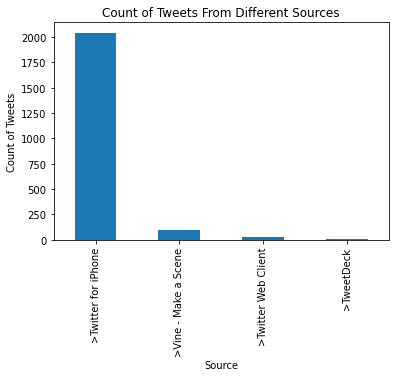

In [89]:
#Plotting a bar graph of the value counts
twitter_master.source.value_counts().plot(kind = 'bar', title = 'Count of Tweets From Different Sources', xlabel = 'Source', ylabel = 'Count of Tweets');


##### Which tweets were the users most favorite and what ratings do they have?

I investigated the tweets which were the users' favorites using the favorite count column and look at their ratings to see how these tweets were rated.

In [90]:
#Filtering the top 10 most favorite total counts
df_top10 = twitter_master['favorite_count'].nlargest(n=10)
df_top10

348    132810
862    131075
63     107956
445    107015
119    106827
374     95450
103     85011
447     75639
147     75193
901     75163
Name: favorite_count, dtype: int64

It is observed above that the tweet that was the most favorite had 132810 votes and the top 10 are shown above. I then move to see graphically what is the most common rating of the top 10 favorite tweets using a histogram below.

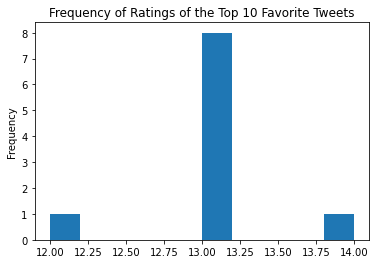

In [91]:
#Filtering the top 10 favorite tweets
df_favorites = twitter_master.query('favorite_count >= 75163')
#Plotting a histogram of the ratings of the top 10 tweets
df_favorites.rating_numerator.plot(kind= 'hist', title = 'Frequency of Ratings of the Top 10 Favorite Tweets', xlabel = 'Ratings');
plt.savefig("fig2", dpi = 200)

From the histogram above, we can see that most of the top 10 favorite tweets had a rating of 13.

##### What are the most common vs rare dog names?

I also investigated on which dog names were the most common in the master data using the name column and seeing how frequent the name was used.

In [92]:
#Getting the value counts of each name and sorting them ascending.
twitter_master.name.value_counts().sort_values()

Stu         1
Maude       1
Margo       1
Newt        1
Brady       1
           ..
Penny       9
Oliver     10
Cooper     10
Lucy       11
Charlie    11
Name: name, Length: 930, dtype: int64

In [94]:
#Getting the value counts of each name descending
twitter_master.name.value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
              ..
Shiloh         1
Gustav         1
Arlen          1
Lenox          1
Christoper     1
Name: name, Length: 930, dtype: int64

We can see the top names were Charlie and Lucy while there were numerous names with only one count as per the analysis above.

### Insights:
1. From the first question, what source has the highest number of tweets. From the dataframe, the largest source is Twitter from Iphone with 2042 tweets, while the lowest is Tweet Deck with 11.
 
2. From the second question, what tweets were the users' most favorite and what rating was most common among them. We have observed that the most favourite tweet had a count of 132810. Among the top 10 most favorite tweets, the most frequent rating was 13.

3. From the third question, what were the most common vs rare dog names in the dataframe. We observed that Charlie, Lucy, Cooper, Oliver and Penny were the most common while there were numerous names that were used only once.

### Visualization

Here is the visualization of the count of tweets from each of the sources used in the dataframe.

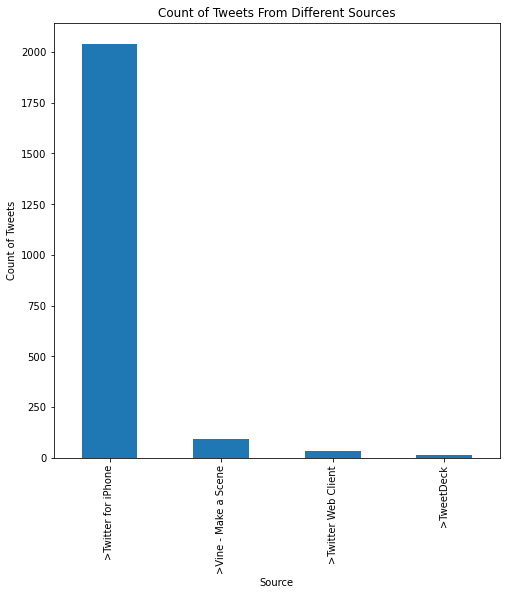

In [95]:
#Plotting a bar graph of the value counts
twitter_master.source.value_counts().plot(kind = 'bar', figsize = (8,8), title = 'Count of Tweets From Different Sources', xlabel = 'Source', ylabel = 'Count of Tweets');
plt.savefig("fig1", dpi = 300)